In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from take_image import take_image
from functions import *

In [63]:
def fix_row(wrong_row:list,start_pixel:int, range_size:int):
    range_to_check = start_pixel
    wrong_row = sorted(wrong_row)
    range_to_check = start_pixel
    end_range_to_check = range_to_check+range_size
    #get average y value in this row
    avg_y_value = int(sum(elem[1] for elem in wrong_row) / len(wrong_row))

    for i in range(20):
        
        #check all ranges if there is an entry in wrong row
        #print('Range start check',range_to_check)
        #print('Range end check',end_range_to_check)
        #print(wrong_row[i][0])
        if wrong_row[i][0] not in range(range_to_check,end_range_to_check) and len(wrong_row) < 20:
            #checking length of row if a point needs to be inserted
            
            #insert a new point in the list
            print('------------------') 
            print('point',i+1,'is not in range')
            print('------------------\n')
            #insert a point with average + half the range x and y value for this row
            insertion_values =(int(range_to_check+(range_size/2)),avg_y_value)
            
            
            wrong_row.insert(i,insertion_values)
            print('inserted',insertion_values)
            print('length after insertion:', len(wrong_row))
            fixed_row = wrong_row
        

        # set new values for the range to check
        range_to_check += range_size
        end_range_to_check += range_size
    
    if len(fixed_row) == 20:
        return fixed_row
    else:
        print('error',len(fixed_row))

In [64]:
# def sort_coordinates_by_y(coordinates:list, threshold:int):
#     # Sort coordinates by y value
#     coordinates.sort(key=lambda c: c[1])
    
#     # Group coordinates into rows based on y value range
#     rows = []
#     current_row = []
#     previous_y = None
    
#     for x, y in coordinates:
#         if previous_y is None or y - previous_y <= threshold:  # define range by your requirement
#             current_row.append((x, y))
#         else:
#             rows.append(current_row)
#             current_row = [(x, y)]
        
#         previous_y = y
    
#     if current_row:
#         rows.append(current_row)
    
#     # Sort rows by average y value
#     rows.sort(key=lambda r: sum(c[1] for c in r) / len(r))
    
#     return rows
from typing import List

def sort_coordinates_by_y(coordinates: List[tuple], threshold: int) -> List[List[tuple]]:
    # Sort coordinates by y value
    coordinates.sort(key=lambda c: c[1])
    
    # Group coordinates into rows based on y value range
    rows = []
    current_row = []
    previous_y = None
    
    for x, y in coordinates:
        if previous_y is None or y - previous_y <= threshold:
            current_row.append((x, y))
        else:
            # Split current row into sub-rows with a maximum of 20 elements
            sub_rows = [current_row[i:i+20] for i in range(0, len(current_row), 20)]
            for sub_row in sub_rows:
                # Sort sub-row by distance to average y value of current row
                avg_y = sum(c[1] for c in current_row) / len(current_row)
                sub_row.sort(key=lambda c: abs(c[1] - avg_y))
                rows.append(sub_row)
            current_row = [(x, y)]
        
        previous_y = y
    
    if current_row:
        # Split current row into sub-rows with a maximum of 20 elements
        sub_rows = [current_row[i:i+20] for i in range(0, len(current_row), 20)]
        for sub_row in sub_rows:
            # Sort sub-row by distance to average y value of current row
            avg_y = sum(c[1] for c in current_row) / len(current_row)
            sub_row.sort(key=lambda c: abs(c[1] - avg_y))
            rows.append(sub_row)
    
    # Sort rows by average y value
    rows.sort(key=lambda r: sum(c[1] for c in r) / len(r))
    
    return rows

Circles found: 393


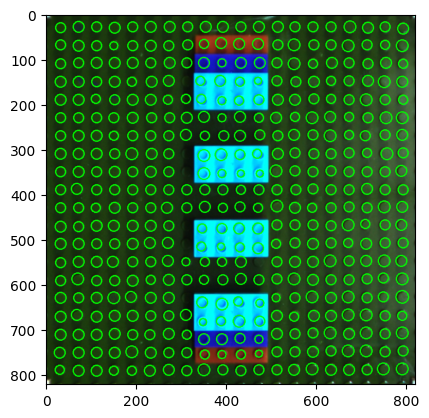

In [65]:
planpath = '/home/steve/Vorlesungen/FE_Projekt/F-E_Projekt_Montage/photos/plan_castle/pyramide4.png'
photopath = '/home/steve/Vorlesungen/FE_Projekt/F-E_Projekt_Montage/photos/ids_bridge/bridge3.jpg'



photo = cv2.imread(photopath)
#photo = cv2.cvtColor(photo,cv2.COLOR_BGR2RGB)

photo = extract_plate(photo)
circles_list, circle_image = detect_circles(photo,real_photo=True, expected_circles_per_longest_side=10, debug=False)
plt.imshow(circle_image)
plt.show(block=True)
#print(sorted(circles_template))

In [66]:

photo_width = photo.shape[0]
print(photo_width)
number_of_ranges = 21
range_size = int(round(photo_width/number_of_ranges))
print('range_size',range_size)
#print(sorted(circles_list))
start_pixel = int(round(range_size/2))

#From here a detected circle can occur
print('start_pixel', start_pixel)

#from here on no circle should be 
end_pixel = int(round(photo_width - start_pixel))
print('end_pixel', end_pixel)



822
range_size 39
start_pixel 20
end_pixel 802


# Sort the rows by the y value and just find ones where len != 20

In [67]:
# rows = sort_coordinates_by_y(circles_list,threshold=14)
# for i in range(len(rows)):
#     if len(rows[i]) == 20: # row contains right amount of circles
#         print('Row:',i+1,'is correct')
#         continue
#     else:
#         print('---------------------------------------------------------------')
#         print('Row:',i+1,'with length', len(rows[i]))
#         wrong_row = rows[i]
#         print(sorted(rows[i]))
#         print('\n')
    

# Sort the rows by the y value and fix the ones where len != 20


In [68]:
rows = sort_coordinates_by_y(circles_list,threshold=16)
for i in range(len(rows)):
    if len(rows[i]) == 20: # row contains right amount of circles
        print('Row:',i+1,'is correct')
        continue
    else:
        print('---------------------------------------------------------------')
        print('Row:',i+1,'with length', len(rows[i]))
        wrong_row = rows[i]
        print(sorted(rows[i]))
        rows[i] = fix_row(wrong_row, start_pixel, range_size)
        print('Fixed row with length:',len(rows[i]),'\n',rows[i])
        print('\n')
    

Row: 1 is correct
Row: 2 is correct
Row: 3 is correct
---------------------------------------------------------------
Row: 4 with length 19
[(32, 150), (72, 150), (112, 150), (152, 150), (190, 150), (234, 150), (272, 148), (342, 148), (386, 148), (430, 150), (470, 148), (512, 148), (554, 150), (594, 150), (632, 148), (672, 148), (714, 148), (750, 150), (790, 150)]
------------------
point 8 is not in range
------------------

inserted (312, 149)
length after insertion: 20
Fixed row with length: 20 
 [(32, 150), (72, 150), (112, 150), (152, 150), (190, 150), (234, 150), (272, 148), (312, 149), (342, 148), (386, 148), (430, 150), (470, 148), (512, 148), (554, 150), (594, 150), (632, 148), (672, 148), (714, 148), (750, 150), (790, 150)]


Row: 5 is correct
Row: 6 is correct
Row: 7 is correct
---------------------------------------------------------------
Row: 8 with length 19
[(32, 310), (72, 310), (112, 310), (152, 310), (190, 310), (234, 310), (272, 310), (350, 314), (388, 312), (430, 3

Number of circles after fix grids:  400


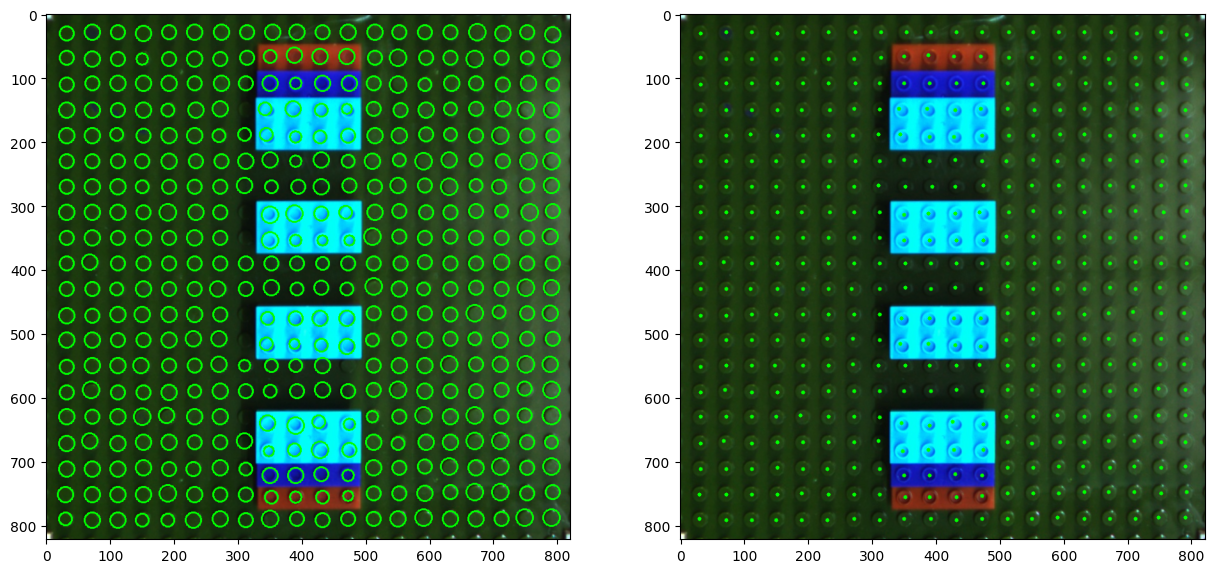

In [69]:

img = photo.copy()

# define the function to draw a circle around a point
def draw_circle(img, x,y):
    cv2.circle(img, (x, y), 3, (0, 255, 0), -1)
number= 0
# loop through the coordinates and draw a circle around each point
for idx,j in enumerate(rows):
    for coord in j:
     
        draw_circle(img, int(coord[0]), int(coord[1]))
        number+=1
print('Number of circles after fix grids: ',number)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(circle_image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img)

In [70]:
circles_list = [[x for x in tup] for lst in rows for tup in lst]
for i in range(20):
    print(len(rows[i]))

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


new color sample function


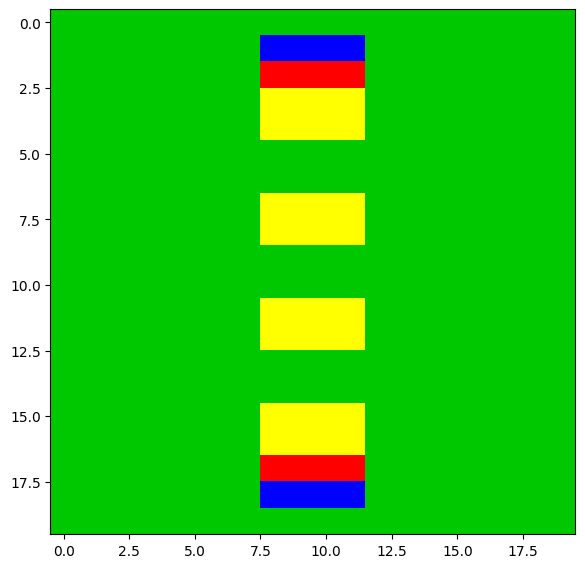

In [71]:

matrix_photo, matrix_photo_position= get_matrix(photo,circles_list)
print('new color sample function')
#for i in range(20):
#    print(len(matrix_photo[i]))

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(display_lego_pattern(matrix_photo))

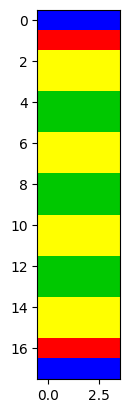

In [72]:
from functions import *
photo_array = matrix_photo
template_array =  [
            [
                "blue",
                "blue",
                "blue",
                "blue"
            ],
            [
                "red",
                "red",
                "red",
                "red"
            ],
            [
                "yellow",
                "yellow",
                "yellow",
                "yellow"
            ],
            [
                "yellow",
                "yellow",
                "yellow",
                "yellow"
            ],
            [
                "green",
                "green",
                "green",
                "green"
            ],
            [
                "green",
                "green",
                "green",
                "green"
            ],
            [
                "yellow",
                "yellow",
                "yellow",
                "yellow"
            ],
            [
                "yellow",
                "yellow",
                "yellow",
                "yellow"
            ],
            [
                "green",
                "green",
                "green",
                "green"
            ],
            [
                "green",
                "green",
                "green",
                "green"
            ],
            [
                "yellow",
                "yellow",
                "yellow",
                "yellow"
            ],
            [
                "yellow",
                "yellow",
                "yellow",
                "yellow"
            ],
            [
                "green",
                "green",
                "green",
                "green"
            ],
            [
                "green",
                "green",
                "green",
                "green"
            ],
            [
                "yellow",
                "yellow",
                "yellow",
                "yellow"
            ],
            [
                "yellow",
                "yellow",
                "yellow",
                "yellow"
            ],
            [
                "red",
                "red",
                "red",
                "red"
            ],
            [
                "blue",
                "blue",
                "blue",
                "blue"
            ]
        ]

plt.imshow(display_lego_pattern(template_array))


In [73]:
# template_array = np.rot90(template_array,1,axes=(1,0))
# plt.imshow(display_lego_pattern(template_array))

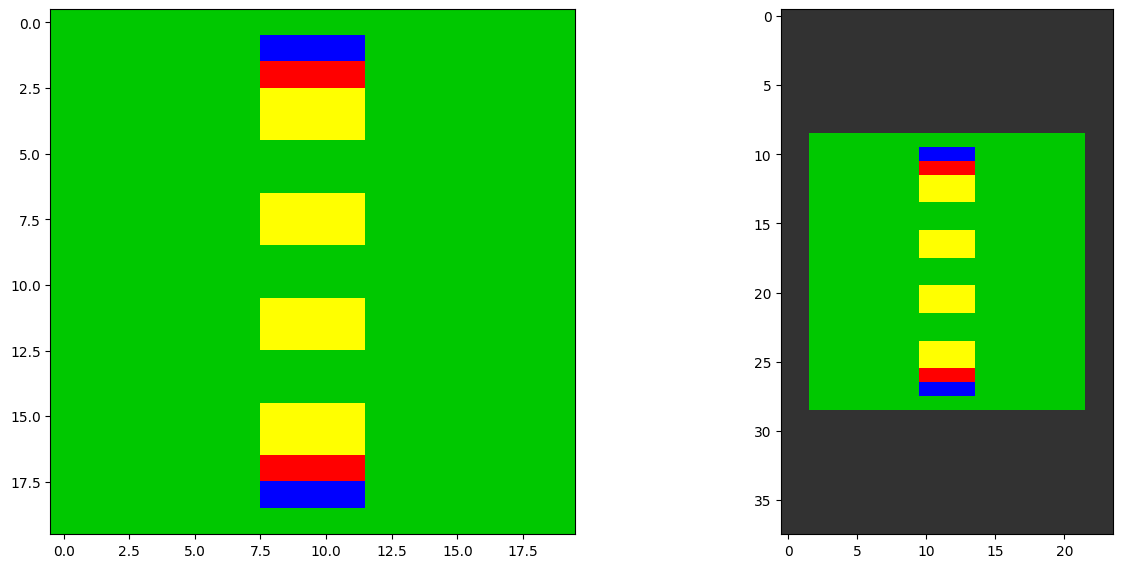

In [84]:

padded = add_padding(template_array,photo_array)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(display_lego_pattern(matrix_photo))

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(display_lego_pattern(padded))